In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
df = pd.DataFrame.from_csv('gs_sentiment.csv')
df['date'] = df['date'].astype('datetime64')

/home/deepan/Dropbox/Projects/fourele/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
print(df.describe())

                 id  gs_magnitude      gs_score       news_id
count  75170.000000  75170.000000  75170.000000  75170.000000
mean   37601.500000      0.491445     -0.001893   4521.562991
std    21699.854205      0.656819      0.305630   1843.349477
min       17.000000      0.000000     -0.900000   1217.000000
25%    18809.250000      0.100000     -0.100000   2987.000000
50%    37601.500000      0.300000      0.000000   4494.000000
75%    56393.750000      0.700000      0.100000   5961.000000
max    75186.000000     67.800003      0.900000  11541.000000


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 75170 entries, 0 to 75169
Data columns (total 7 columns):
id              75170 non-null int64
text            75170 non-null object
gs_magnitude    75170 non-null float64
gs_score        75170 non-null float64
news_id         75170 non-null int64
date            75170 non-null datetime64[ns]
time            75170 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.6+ MB
None


In [17]:
df = df[df['gs_score'] != 0]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49264 entries, 1 to 75167
Data columns (total 7 columns):
id              49264 non-null int64
text            49264 non-null object
gs_magnitude    49264 non-null float64
gs_score        49264 non-null float64
news_id         49264 non-null int64
date            49264 non-null datetime64[ns]
time            49264 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB
None


In [18]:
print(df['date'].min())

2008-05-15 00:00:00


In [19]:
cp = pd.read_csv('NExT/LME/LMCADY.csv', index_col=0, parse_dates=True)
print(cp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7764 entries, 1986-04-01 to 2016-12-30
Data columns (total 1 columns):
LMCADY    7764 non-null float64
dtypes: float64(1)
memory usage: 121.3 KB
None


In [20]:
mask = (cp.index > '2008-05-12')
cp = cp.loc[mask]

In [21]:
print(cp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2008-05-13 to 2016-12-30
Data columns (total 1 columns):
LMCADY    2184 non-null float64
dtypes: float64(1)
memory usage: 34.1 KB
None


In [22]:
import random


def sent_for_day(row):
    articles = df[df['date'] == row.name]
    row['article_count'] = articles.shape[0]
    row['gs_score_mean'] = articles.gs_score.mean()
    row['gs_score_std'] = articles.gs_score.std()
    row['gs_magnitude_mean'] = articles.gs_magnitude.mean()
    row['gs_magnitude_std'] = articles.gs_magnitude.std()
    return row


cp = cp.apply(sent_for_day, axis=1)
cp = cp.fillna(cp.mean())

In [24]:
print(cp.describe())
print(cp.info())

ff = cp.iloc[:10]
print(ff)

             LMCADY  article_count  gs_score_mean  gs_score_std  \
count   2184.000000    2184.000000    2184.000000   2184.000000   
mean    6723.670055      14.872711      -0.011835      0.355941   
std     1553.526947      18.931013       0.129780      0.071629   
min     2809.500000       0.000000      -0.666667      0.000000   
25%     5503.187500       0.000000      -0.059183      0.335743   
50%     6981.875000       9.000000      -0.011835      0.355941   
75%     7735.250000      22.000000       0.037153      0.380285   
max    10179.500000     211.000000       0.650000      0.848528   

       gs_magnitude_mean  gs_magnitude_std  
count        2184.000000       2184.000000  
mean            0.601616          0.438672  
std             0.196590          0.180041  
min             0.100000          0.000000  
25%             0.494701          0.326171  
50%             0.601616          0.438672  
75%             0.625601          0.446050  
max             2.211111          1.

In [25]:
cp.to_csv('copper_with_daily_sentiment.csv')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))

In [13]:
prices = np.array(cp.LMCADY).reshape(-1,1)

In [14]:
scaled_prices = scaler.fit_transform(prices)

In [15]:
cp['scaled_prices'] = scaled_prices

In [16]:
cp['date'] = cp.index

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")


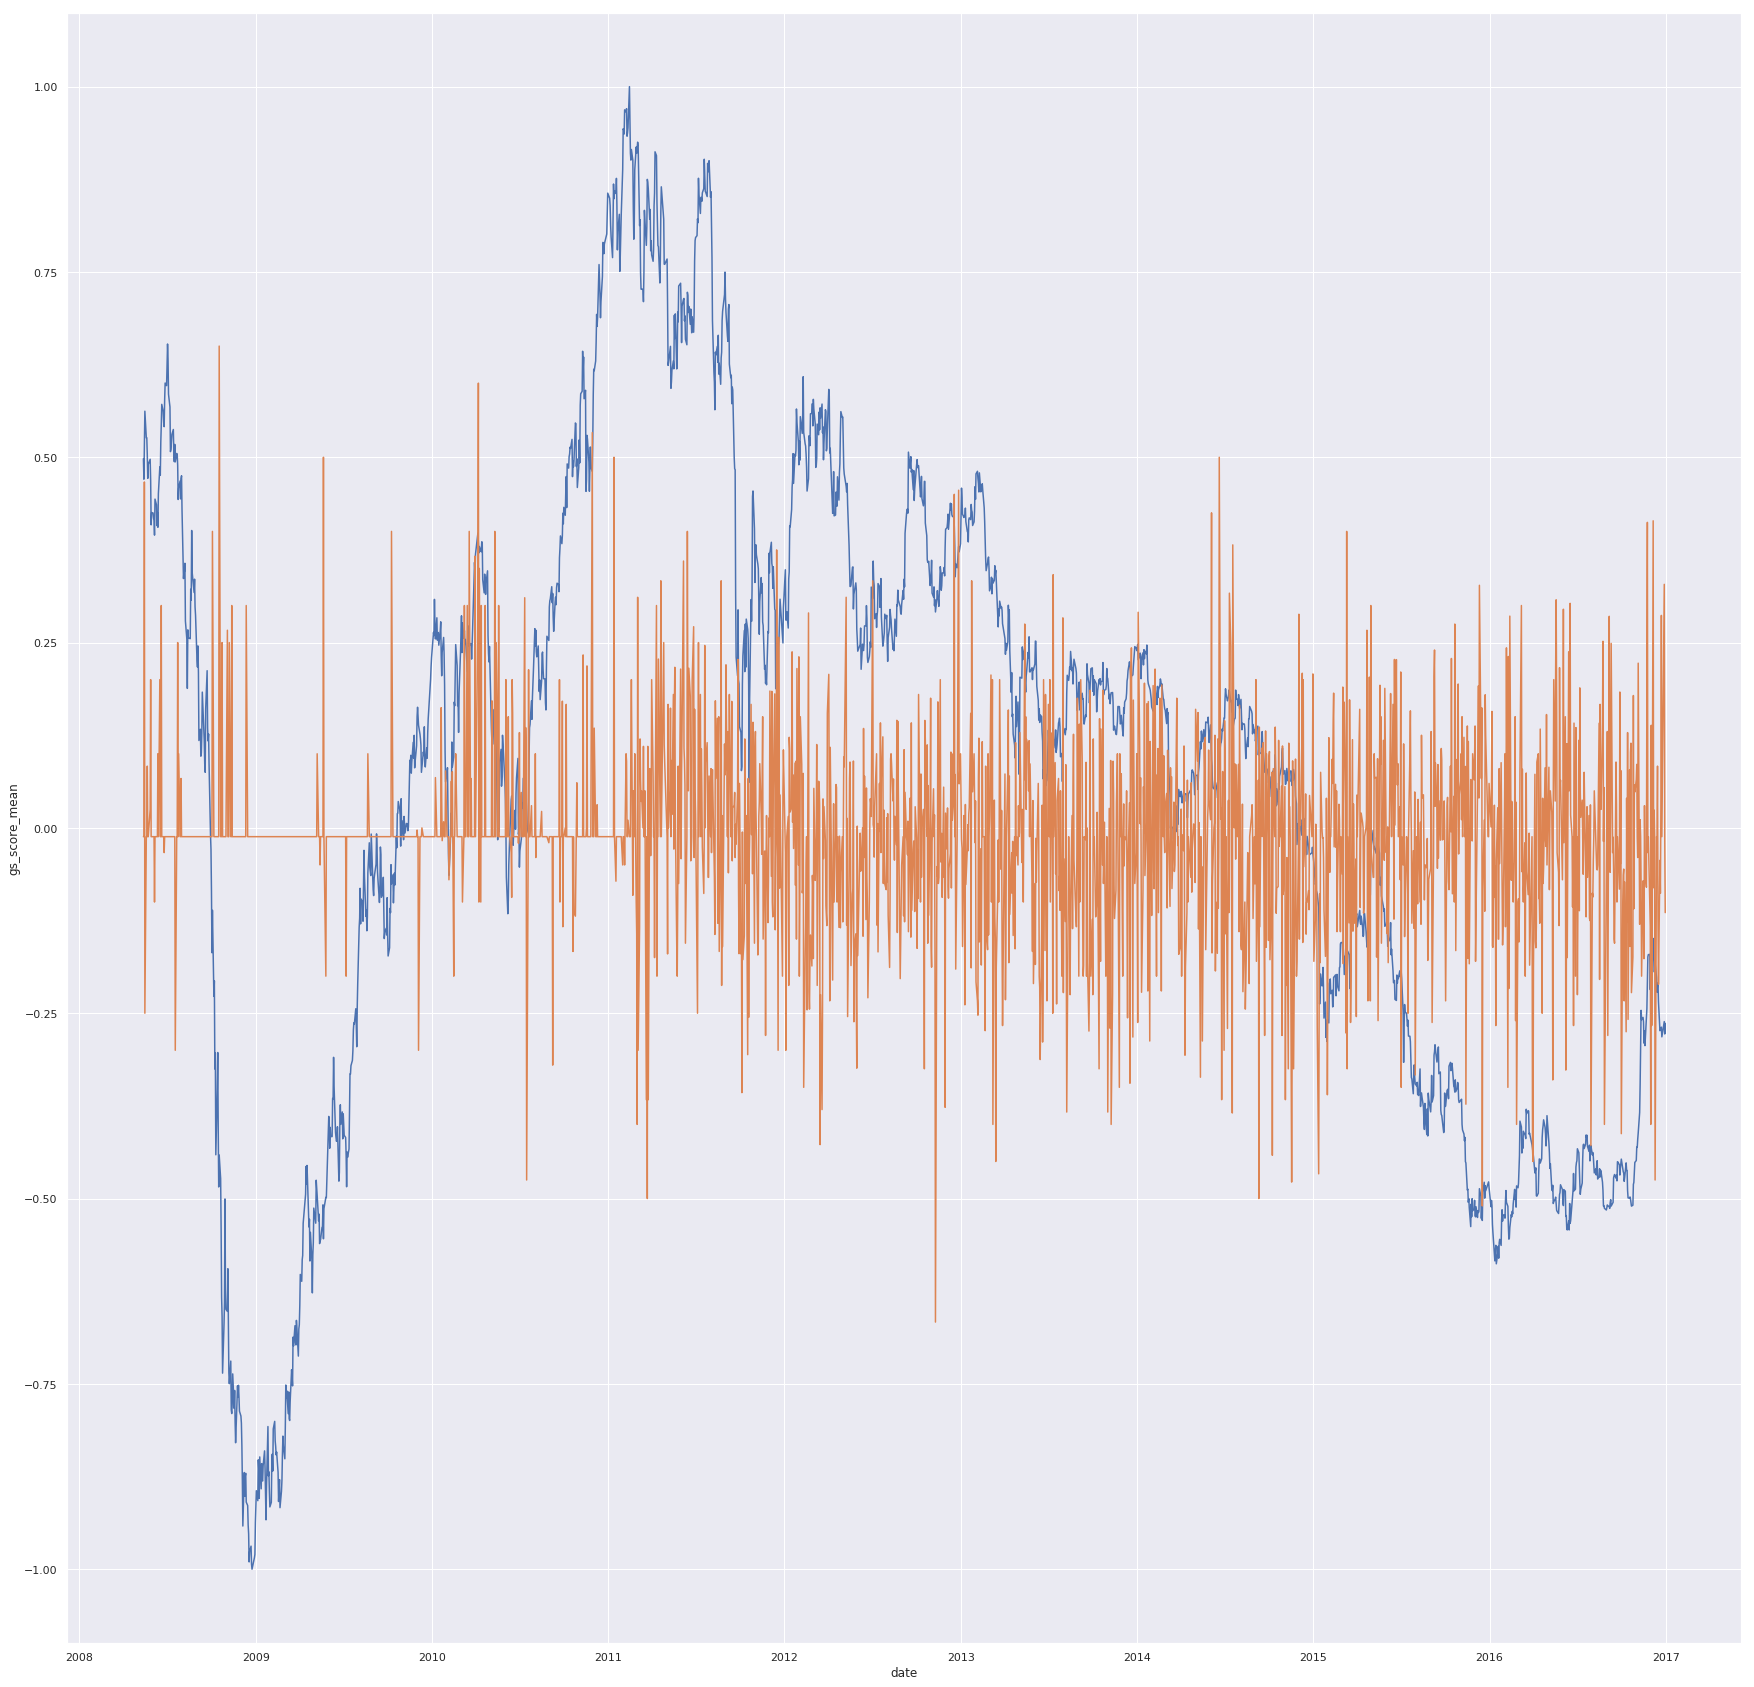

In [98]:
plt.figure(figsize=(30,30))

sns.lineplot(x="date", y="scaled_prices", data=cp)
sns.lineplot(x='date', y='gs_score_mean', data=cp)
# sns.lineplot(x='date', y='gs_score_std', data=cp)
